In [2]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os
from pydantic import BaseModel

from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

## OpenAI Model

In [6]:
api_key=os.getenv("OPENAI_API_KEY")

# Define a model client. You can use other model client that implements
# the `ChatCompletionClient` interface.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=api_key,
)

In [7]:
agent = AssistantAgent(name="AIAssistant", model_client=model_client)

## Create a multi-modal message with random image and text.


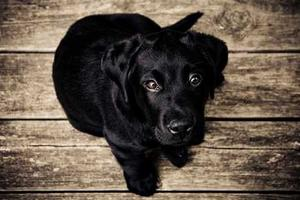

In [3]:
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/id/237/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [8]:
result = await agent.run(task=multi_modal_message)

In [9]:
result.messages[-1].content

'The image shows a black Labrador puppy sitting on a wooden surface, looking up at the camera.'